In [178]:
# !pip install scipy

In [30]:
import math
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import scipy.stats as st
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

# Задания для самостоятельного решения


<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

- Для доверительной вероятности β = 0.95 вычислим α = 1−β = 0.05  
- В таблице нормального распределения находим квантиль уровня 1−α/2 = 0.975 --> Z = 1.96.    
- Или рассчитаем с помощью Python st.norm.ppf(0.975).

In [179]:
D = 225
sigma = 15                                    # Стандартное отклонение (корень из дисперсии)
Z = st.norm.ppf(0.975)                        # 95%      # Квантиль нормального распределения. 
Delta = 3                                     #%         # Погрешность

N = ((sigma*Z)/Delta)**2
print(f'Необходимый минимальный объем выборки = {round(N, 0)}')

Необходимый минимальный объем выборки = 96.0


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

* Среднее значение равно  $\overline x$ = 130
* стандартное отклонение $\sigma = S = 15$
* Так как неизвестна дисперсия генеральной совокупности и n < 30, поэтому точность интервальной оценки 
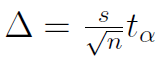
* По таблице распределения Стьюдента находим 1 − α/2 = 0.995 и, так как у нас n − 1 = 24 степеней свободы, определяем квантиль tα = 2.797
* Доверительный интервал: ($\overline x$ - $\Delta$, $\overline x$ + $\Delta$)

In [180]:
n = 25
m = 130
S = 15
confidence = 0.99

h = round(S / math.sqrt(n) * st.t.ppf((1 + confidence)/2, n-1), 1)
print(f'Delta = {h} \n')
print(f'98% доверительный интервал для среднего значения: ({m-h}, {m+h})')

Delta = 8.4 

98% доверительный интервал для среднего значения: (121.6, 138.4)


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [170]:
import scipy.stats as stats
np.random.seed(42) #фиксация случайности

mens  = st.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = st.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

tvalue, pvalue = st.ttest_ind(mens, womens) #Критерий Стьюдента (t-test)
print(f't-value={tvalue:.4f}, p-value={pvalue:.4f} \n')

alpha = 0.001

if (pvalue < alpha):
    print(f'Отвергаем нулевую гипотезу, различия между выборками значительно')
else:
    print(f'Не отвергаем нулевую гипотезу, различие между выборками незначительно')

t-value=3.6636, p-value=0.0002 

Отвергаем нулевую гипотезу, различия между выборками значительно


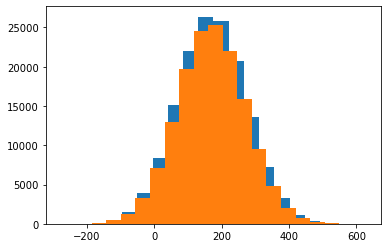

In [171]:
plt.hist(mens, bins=20); #Выборка A
plt.hist(womens, bins=20);  #Выборка B

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [105]:
sigma = 150
Z = st.norm.ppf(0.975)
Delta = 50

n = round((Z*sigma/Delta)**2)
print(f'Средний чек за кофе: {n} рублей')

Средний чек за кофе: 35.0 рублей


<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [111]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [114]:
import scipy.stats as stats
# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact(observations.values)#Возможно пригодится эта функция.

alpha = 0.05
print(f'p-value={pvalue:.6f}, alpha={alpha} \n')

if pvalue < alpha:
    print(f'Отвергаем нулевую гипотезу. Это правда волшебник!')
    print(f'')
else:
    print(f'Не отвергаем гипотезу. Волшебник не может предсказывать погоду')

p-value=0.354180, alpha=0.05 

Не отвергаем гипотезу. Волшебник не может предсказывать погоду


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [118]:
def mean_confidence_interval(data, confidence=0.95):   
    n = len(data)
    m, se = np.mean(data), st.stats.sem(data)
    h = se * st.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h  #,h

In [119]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

print(mean_confidence_interval(data, 0.90))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [131]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]
 

tvalue, pvalue = stats.ttest_ind(A, B)
print(f't-value={tvalue:.4f}, p-value={pvalue:.4f} \n')

alpha = 0.05
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу, данные принадлежат разным множествам')
else:
    print('Не отвергаем нулевую гипотезу')

t-value=11.8652, p-value=0.0000 

Отвергаем нулевую гипотезу, данные принадлежат разным множествам


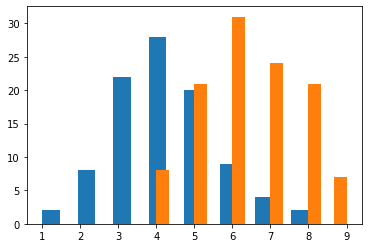

In [132]:
# Более наглядно это видно на гистограмме

plt.hist(B, bins=15);
plt.hist(A, bins=15);

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

## Выводы:

Т.к. уровень значимости не указан, то если $\alpha=0.05$, тогда p-value < $\alpha$ и значит можно отвергнуть нулевую гипотезу о том, что распределение нормальное. Распеределение ненормальное.
Если, p-value > $\alpha$, то не отвергаем нулевую гипотезу.
Таким образом для подтверждения гипотезы необходимо знать уровень значимости или уровень доверия.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

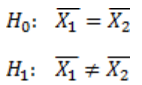


In [156]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

In [176]:
tvalue, pvalue = st.ttest_ind(A, B, equal_var = False)
print(f't-value={tvalue:.4f}, p-value={pvalue:.4f} \n')

alpha= 0.05

if (pvalue < alpha):
    print('Отвергаем нулевую гипотезу, есть различия в эффективности действия препаратов')
else:
    print('Не отвергаем нулевую гипотезу, значимого различия эффективности препаратов нет')

t-value=-1.9530, p-value=0.0513 

Не отвергаем нулевую гипотезу, значимого различия эффективности препаратов нет


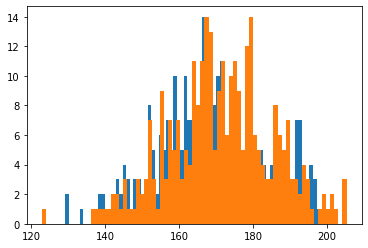

In [177]:
plt.hist(A, bins=75);
plt.hist(B, bins=75);

In [ ]:
#  При p-value = 0.049999999.... различия были бы уже значимы, p-value должно быть меньше уровня значимости. 